In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [19]:
data = pd.read_csv('/home/hasan/DATA SET/smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [20]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
data.shape

(5572, 2)

# Feature Engineering

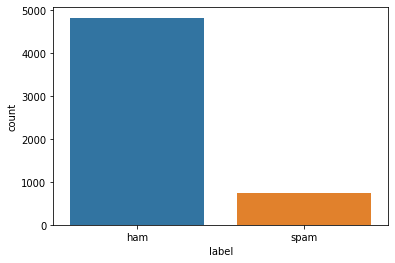

In [22]:
#checking balance or imbalance data
sns.countplot(data['label'])

this dataset is totally imbalanced

In [23]:
#Data cleaning, lowercase, splitting, stemming
ps = PorterStemmer()
row_word_list = []

for i in range(len(data)):
    process = re.sub('[^a-zA-Z]', " ", data['message'][i])
    process = process.lower()
    process = process.split()
    
    process = [ps.stem(word) for word in process if not word in stopwords.words('english')]
    process = ' '.join(process)
    row_word_list.append(process)


# Bag of wrords model

In [37]:
cv = CountVectorizer()
X = cv.fit_transform(row_word_list).toarray()

#label data
y = data['label'].map({'ham':1, 'spam':0})


# splitting dataset

In [38]:
xtrain,xtest, ytrain,ytest = train_test_split(X,y, test_size=.25, random_state=0)

# Model

In [39]:
model = MultinomialNB()
model.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
#score of the model
score = model.score(xtest,ytest)
score

0.9791816223977028

In [42]:
#predicting with test data
predicted = model.predict(xtest)
predicted

array([1, 0, 1, ..., 0, 1, 1])

# Classification Report

In [45]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       185
           1       0.99      0.99      0.99      1208

    accuracy                           0.98      1393
   macro avg       0.95      0.96      0.96      1393
weighted avg       0.98      0.98      0.98      1393



# Confusion Matrix

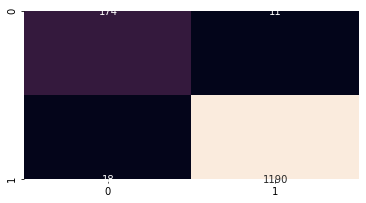

In [47]:
sns.heatmap(confusion_matrix(ytest, predicted),square=True, annot=True, fmt='d', cbar=False)